# Assignment 1

### Question 1: Homework incentives

Recall the student's problem from the first lecture. We are examining the dynamic incentives that affect a student's choices to submit homework assignments. In every period $t=1,\ldots,\check{t}$, the student decides whether to submit an assignment or not. For your convenience, we first copy the code from the lecture's example. 

In [2]:
nAss = 11;
k = 3;
gradeScheme=@(hwGrade,assPassed,finGrade)(0.25*hwGrade*(assPassed>nAss-k)+0.75*finGrade); % Harsh
% gradeScheme=@(hwGrade,assPassed,finGrade)(0.4*hwGrade*assPassed/nAss+0.6*finGrade); % Smooth
effortCost = ones(1,nAss)*0.3;
successPr = 0.9;
hwGrade = 10;
finGradePr = [0 0.05 0.05 0.1 0.15 0.15 0.2 0.15 0.10 0.05 0];
u=@(grade)(grade-10*(grade<5.25));
rho = 0.9;

In [3]:
% Initialization
v=nan(nAss+1,nAss+1); UWork=nan(nAss,nAss); UShirk=UWork; work=UWork;
assPassed = ones(11,1)*(0:nAss);
finGrade = (0:10)'*ones(1,nAss+1);
v(nAss+1,:) = finGradePr*u(gradeScheme(hwGrade, assPassed, finGrade));

In [4]:
% Solve by Backward Recursion
for ass=nAss:-1:1
    UShirk(ass,1:ass) = rho*v(ass+1,1:ass);
    UWork(ass,1:ass) = successPr*rho*v(ass+1,2:ass+1)+(1-successPr)*UShirk(ass,1:ass)-effortCost(ass);
    work(ass,1:ass)=UWork(ass,1:ass)>UShirk(ass,1:ass);
    v(ass,1:ass) = max([UWork(ass,1:ass);UShirk(ass,1:ass)]);
end

In [5]:
work


work =

     1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
     1     1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
     0     1     1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
     0     1     1     1   NaN   NaN   NaN   NaN   NaN   NaN   NaN
     0     0     1     1     1   NaN   NaN   NaN   NaN   NaN   NaN
     0     0     0     1     1     1   NaN   NaN   NaN   NaN   NaN
     0     0     0     0     1     1     1   NaN   NaN   NaN   NaN
     0     0     0     0     0     1     1     1   NaN   NaN   NaN
     0     0     0     0     0     0     1     1     1   NaN   NaN
     0     0     0     0     0     0     0     1     1     0   NaN
     0     0     0     0     0     0     0     0     1     0     0




Let $v_t(x)$ be the student's expected discounted utility just prior to deciding on assignment $t$ if (s)he has passed $x$ of the previous $t-1$ assignments.

a) **Write the Bellman equations for $v_t$, $1\leq t<\check{t}$, and for $v_\check{t}$ (note that the value for the final assignment needs special attention).**

$$\alpha_2$$ this is a variable

In [6]:
UWork


UWork =

   -0.7142       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -0.8960   -0.4118       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -1.3882   -0.6056   -0.0707       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -1.6022   -1.1988   -0.2440    0.3102       NaN       NaN       NaN       NaN       NaN       NaN       NaN
   -1.7468   -1.7468   -0.9488    0.1745    0.7339       NaN       NaN       NaN       NaN       NaN       NaN
   -1.9076   -1.9076   -1.9076   -0.6224    0.6550    1.2037       NaN       NaN       NaN       NaN       NaN
   -2.0862   -2.0862   -2.0862   -2.0862   -0.1995    1.2011    1.7229       NaN       NaN       NaN       NaN
   -2.2847   -2.2847   -2.2847   -2.2847   -2.2847    0.3445    1.8150    2.2958       NaN       NaN       NaN
   -2.5052   -2.5052   -2.5052   -2.5052   -2.5052   -2.5052    1.0408    2.4954    2.9274       NaN  

b) **Show that these Bellman equations have a unique solution $v_t$, $1\leq t\leq\check{t}$.**

c) **Show that there exist an optimal strategy for submitting homework assignments that is Markovian. Express this strategy in terms of $v_t$, $1\leq t\leq\check{t}$.**

d) **Using the code above, numerically analyze how the student's optimal strategy changes when the success probability `successPr` changes from below to above its current value of $0.9$, under both grading schemes. Briefly discuss.**

The remaining part of this question considers a realistic modification of the original homework incentives problem. So far, we assumed that the distribution of the final grade is exogenously given. In particular, regardless of the number of assignments submitted, the probability distribution over final grades was given by

In [12]:
% finGradePr = [0 0.05 0.05 0.1 0.15 0.15 0.2 0.15 0.10 0.05 0.0];

Instead, we now assume that the student can stochastically improve her or his final grade by passing more assignments. In particular, suppose that each assignment passed takes probability masses 0.01 from each of the final grades 4,5,6, and 7 and adds probability masses 0.04/3 to each of the final grades 8,9, and 10.

e) **Is this modified problem still a nonstationary Markov decision problem? If so, how does the modification change the Bellman equations for $v_t$, $1\leq t<\check{t}$, and for $v_\check{t}$?**

f) **Adapt the above code to this modified student's problem and solve it numerically. What is the effect on the student's optimal assignment submission choices? In particular, analyze how the student's actions are changed under each grading scheme. Briefly discuss.**

### Question 2: Terminating a relationship

In the first lecture, we also discussed the problem of terminating a relationship. For your convenience, we again copy the example's code below.


In [13]:
mu = -0.1;
sigma = 0.5;
boundX = [-3 3];
nSuppX = 1001;

suppX = boundX(1):(boundX(2)-boundX(1))/(nSuppX-1):boundX(2);
deltaX = ones(nSuppX,1)*suppX - suppX'*ones(1,nSuppX);
thresholdX = (deltaX(:,1:end-1)+deltaX(:,2:end))/2;
capPi = normcdf((thresholdX-mu)/sigma);
capPi = [capPi 1-capPi(:,end)];
capPi(:,2:end-1) = capPi(:,2:end-1) - capPi(:,1:end-2);

% Bellman operator
rho = 0.9;
bellman=@(v)(max([suppX+rho*(capPi*v)';zeros(1,nSuppX)])');

% Solve by value function iteration
v=0; vOld=1; dist = [];
while max(max(abs(v-vOld)))>1E-9
    vOld = v;
    v = bellman(vOld);
    dist = [dist;max(max(abs(v-vOld)))];
end

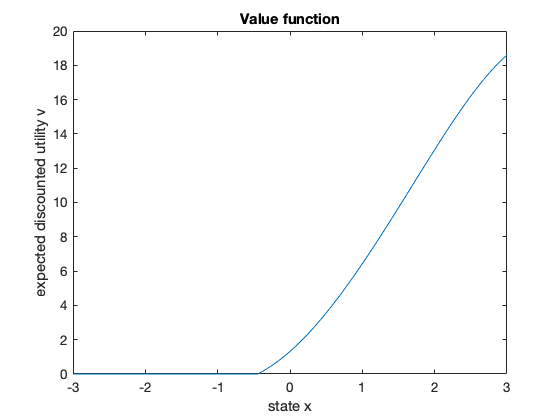

In [14]:
plot(suppX,v) % plot of value function
title("Value function")
xlabel("state x")
ylabel("expected discounted utility v")

a) **What would happen if uncertainty increases, i.e. the variance `sigma` increases. What if there would be no uncertainty? Briefly motivate your answer and modify and run the code to verify it numerically.**

Let $v(x)$ be the expected discounted utility just after learning that the period's state equals $x$, but prior to deciding on continuation.

b) **Write the Bellman equation for $v$.**

The right hand side of this Bellman equation defines a Bellman operator on the appropriate space of value functions.

c) **Explicitly define this space of value functions, with the metric suggested by the code. Show that this metric indeed satisfies the three properties a metric should have (see the theory slides). Demonstrate that the resulting metric space is complete. Write the Bellman operator as a mapping from this space into itself.**

d) **Using all this, prove that the Bellman equation has a unique solution $v$. (Hint: first show that the Bellman operator satisfies Blackwell's sufficient conditions for a contraction.)**

e) **In the code, we use value function iteration to find the fixed point $v$. What are the convergence properties of this algorithm? How could you adapt it to ensure convergence in fewer iterations?**

Finally, show that there exists a threshold so that it is optimal to quit if the state is below this threshold and to stay if it is above it. To this end, solve the following subproblems.

f) **Prove that the value function is weakly increasing. (Hint: Apply the contraction mapping theorem twice, first on the space of all value functions and then to the space of all weakly increasing value functions.)** 

g) **Give an expression for the value of continuing if the state is $x$. Show that this value is strictly increasing in $x$. Conclude that this implies that the optimal stopping rule has the above threshold property.**